In [1]:
from AC_modules.Constructor import *
from Utils import A3C_training
from importlib import reload

In [2]:
# Variable parameters
X = 5
Y = 5
initial = [0,0]
goal = [4,4]
MAX_STEPS = 100

game_params = dict(x=X, y=Y, initial=initial, goal=goal, max_steps=MAX_STEPS, 
                   greyscale_state=True, return_ohe=True)

In [3]:
relational_HPs = torch.load("Results/Sandbox/Supervised/best_HP_S_chosen-residual_UMUT")
#relational_HPs['n_features'] = 256 # reduce because otherwise it crashes
relational_HPs

{'n_kernels': 36,
 'n_features': 256,
 'n_heads': 1,
 'n_attn_modules': 2,
 'feature_hidden_dim': 16,
 'feature_n_residuals': 1}

In [4]:
#name = "OheNet"
name = "GatedBoxWorldNet"
action_space = 4
#n_features = 16

#HPs = dict(gamma=0.99, tau=0.3, n_steps=5, H=1e-3, **relational_HPs)
HPs = dict(gamma=0.99, n_steps=5, H=1e-3, **relational_HPs)
#HPs = dict(gamma=0.99, tau=0.3, n_steps=5, H=1e-3, n_features=256, map_size=X)
#HPs = dict(gamma=0.99, n_steps=5, H=1e-3, n_features=256, map_size=X)
learning_rate = 1e-4
shared_architecture = False

#if torch.cuda.is_available():
#    HPs['device'] = 'cuda'
#else:
HPs['device'] = 'cpu'
    
print("Using device "+HPs['device'])
agent_constructor = ActorCriticConstructor_no_trg(name, shared_architecture, action_space, **HPs)
#agent_constructor = ActorCriticConstructor(name, shared_architecture, action_space, **HPs)

Using device cpu
Model:  <class 'AC_modules.Networks.GatedBoxWorldNet'>
self.model:  <class 'AC_modules.Networks.GatedBoxWorldNet'>
self.shared:  False
self.args:  (4,)
self.kwargs:  {'gamma': 0.99, 'n_steps': 5, 'H': 0.001, 'n_kernels': 36, 'n_features': 256, 'n_heads': 1, 'n_attn_modules': 2, 'feature_hidden_dim': 16, 'feature_n_residuals': 1, 'device': 'cpu'}


In [5]:
reload(A3C_training)

<module 'Utils.A3C_training' from '/m/home/home9/94/dainesn1/unix/Workdir/RelationalDeepRL/Utils/A3C_training.py'>

In [6]:
%%time
results = A3C_training.train_sandbox(agent_constructor, learning_rate, game_params, n_training_threads=11, n_episodes=1000,
                  max_steps=MAX_STEPS, return_agent=True, random_init=True)

Test process started
Process 2 started
Process 1 started
Process 4 started
Process 5 started
Process 6 started
Process 3 started
All processes started
Process 10 started
Process 7 started
Process 9 started
Process 8 started
Process 11 started
Test 2 - reward 1.00 - steps to solve 38.00
Test 3 - reward 1.00 - steps to solve 25.00
Test 4 - reward 1.00 - steps to solve 18.00
Test 5 - reward 1.00 - steps to solve 17.50
Test 6 - reward 1.00 - steps to solve 15.00
Test 7 - reward 1.00 - steps to solve 14.17
Test 8 - reward 1.00 - steps to solve 25.29
Test 9 - reward 1.00 - steps to solve 22.75
Test 11 - reward 1.00 - steps to solve 22.50
Test 12 - reward 1.00 - steps to solve 21.00
Test 13 - reward 1.00 - steps to solve 22.10
Test 14 - reward 0.90 - steps to solve 31.70
Test 15 - reward 0.90 - steps to solve 31.30
Test 16 - reward 0.80 - steps to solve 40.80
Test 17 - reward 0.80 - steps to solve 39.90
Test 18 - reward 0.80 - steps to solve 31.20
Test 19 - reward 0.80 - steps to solve 34.30


Test 196 - reward 0.50 - steps to solve 67.60
Test 197 - reward 0.60 - steps to solve 59.70
Test 198 - reward 0.60 - steps to solve 60.60
Test 199 - reward 0.60 - steps to solve 62.60
Test 201 - reward 0.80 - steps to solve 46.70
Test 202 - reward 0.90 - steps to solve 38.90
Test 203 - reward 0.90 - steps to solve 38.90
Test 204 - reward 0.80 - steps to solve 48.60
Test 205 - reward 0.80 - steps to solve 46.90
Test 206 - reward 0.80 - steps to solve 45.30
Test 207 - reward 0.80 - steps to solve 44.70
Test 208 - reward 0.70 - steps to solve 53.60
Test 209 - reward 0.70 - steps to solve 47.50
Test 211 - reward 0.70 - steps to solve 62.50
Test 212 - reward 0.60 - steps to solve 70.30
Test 213 - reward 0.70 - steps to solve 62.80
Test 214 - reward 0.80 - steps to solve 60.20
Test 215 - reward 0.80 - steps to solve 57.20
Test 216 - reward 0.80 - steps to solve 53.40
Test 217 - reward 0.80 - steps to solve 54.90
Test 218 - reward 0.90 - steps to solve 45.40
Test 219 - reward 0.90 - steps to 

Test 395 - reward 0.50 - steps to solve 64.60
Test 396 - reward 0.50 - steps to solve 59.40
Test 397 - reward 0.60 - steps to solve 57.40
Test 398 - reward 0.70 - steps to solve 47.80
Test 399 - reward 0.80 - steps to solve 39.20
Test 401 - reward 0.90 - steps to solve 35.30
Test 402 - reward 0.90 - steps to solve 33.60
Test 403 - reward 0.90 - steps to solve 31.50
Test 404 - reward 0.90 - steps to solve 31.40
Test 405 - reward 0.90 - steps to solve 35.60
Test 406 - reward 0.80 - steps to solve 45.40
Test 407 - reward 0.80 - steps to solve 39.00
Test 408 - reward 0.80 - steps to solve 43.50
Test 409 - reward 0.80 - steps to solve 43.40
Test 411 - reward 0.90 - steps to solve 27.90
Test 412 - reward 0.90 - steps to solve 28.30
Test 413 - reward 0.90 - steps to solve 29.40
Test 414 - reward 0.90 - steps to solve 32.50
Test 415 - reward 0.90 - steps to solve 35.20
Test 416 - reward 1.00 - steps to solve 30.50
Test 417 - reward 0.90 - steps to solve 38.90
Test 418 - reward 0.80 - steps to 

Test 594 - reward 0.10 - steps to solve 95.60
Test 595 - reward 0.20 - steps to solve 87.50
Test 596 - reward 0.30 - steps to solve 84.70
Test 597 - reward 0.30 - steps to solve 84.70
Test 598 - reward 0.30 - steps to solve 84.70
Test 599 - reward 0.40 - steps to solve 75.80
Test 601 - reward 0.30 - steps to solve 80.20
Test 602 - reward 0.40 - steps to solve 71.80
Test 603 - reward 0.50 - steps to solve 70.10
Test 604 - reward 0.60 - steps to solve 62.60
Test 605 - reward 0.50 - steps to solve 70.70
Test 606 - reward 0.50 - steps to solve 71.30
Test 607 - reward 0.60 - steps to solve 61.40
Test 608 - reward 0.70 - steps to solve 53.30
Test 609 - reward 0.70 - steps to solve 60.00
Test 611 - reward 0.80 - steps to solve 54.50
Test 612 - reward 0.70 - steps to solve 62.90
Test 613 - reward 0.70 - steps to solve 58.50
Test 614 - reward 0.60 - steps to solve 66.00
Test 615 - reward 0.70 - steps to solve 65.00
Test 616 - reward 0.60 - steps to solve 67.20
Test 617 - reward 0.60 - steps to 

Test 793 - reward 0.90 - steps to solve 47.80
Test 794 - reward 0.90 - steps to solve 44.40
Test 795 - reward 0.80 - steps to solve 48.80
Test 796 - reward 0.80 - steps to solve 45.70
Test 797 - reward 0.80 - steps to solve 43.30
Test 798 - reward 0.70 - steps to solve 53.20
Test 799 - reward 0.70 - steps to solve 52.80
Test 801 - reward 0.70 - steps to solve 49.80
Test 802 - reward 0.70 - steps to solve 59.20
Test 803 - reward 0.70 - steps to solve 59.10
Test 804 - reward 0.70 - steps to solve 63.10
Test 805 - reward 0.80 - steps to solve 57.70
Test 806 - reward 0.80 - steps to solve 58.00
Test 807 - reward 0.80 - steps to solve 54.70
Test 808 - reward 0.90 - steps to solve 46.80
Test 809 - reward 0.90 - steps to solve 51.60
Test 811 - reward 1.00 - steps to solve 43.30
Test 812 - reward 1.00 - steps to solve 34.80
Test 813 - reward 1.00 - steps to solve 36.70
Test 814 - reward 1.00 - steps to solve 33.70
Test 815 - reward 1.00 - steps to solve 34.20
Test 816 - reward 1.00 - steps to 

Test 992 - reward 0.80 - steps to solve 46.80
Test 993 - reward 0.80 - steps to solve 46.60
Test 994 - reward 0.80 - steps to solve 50.90
Test 995 - reward 0.80 - steps to solve 49.80
Test 996 - reward 0.80 - steps to solve 45.30
Test 997 - reward 0.80 - steps to solve 44.00
Test 998 - reward 0.90 - steps to solve 40.30
Test 999 - reward 1.00 - steps to solve 31.00
Test 1001 - reward 1.00 - steps to solve 21.60
Test 1002 - reward 1.00 - steps to solve 19.00
Test 1003 - reward 1.00 - steps to solve 20.70
Test 1004 - reward 1.00 - steps to solve 17.90
Test 1005 - reward 1.00 - steps to solve 17.80
Test 1006 - reward 1.00 - steps to solve 17.70
Test 1007 - reward 1.00 - steps to solve 25.80
Test 1008 - reward 1.00 - steps to solve 20.30
Test 1009 - reward 0.90 - steps to solve 29.60
Test 1011 - reward 0.90 - steps to solve 33.40
Test 1012 - reward 0.80 - steps to solve 43.30
Test 1013 - reward 0.80 - steps to solve 40.60
Test 1014 - reward 0.80 - steps to solve 37.90
Test 1015 - reward 0.

In [7]:
score, trained_agent, losses, steps_to_solve, optimizer_steps = results

In [8]:
from Utils import utils

In [9]:
save = True
keywords = ['relational','gated','5by5','independent','A3C', str(len(score))+"-episodes","100-steps"] # example

if save:
    save_dir = 'Results/Sandbox/'
    ID = utils.save_session(save_dir, keywords, game_params, HPs, score, steps_to_solve, losses)
    torch.save(trained_agent, save_dir+"agent_"+ID)
else:
    print("Nothing saved")
    pass

Save at Results/Sandbox/S_relational_gated_5by5_independent_A3C_1088-episodes_100-steps_CEAD


/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type IndependentAC. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Actor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won'

In [10]:
from Utils import plot

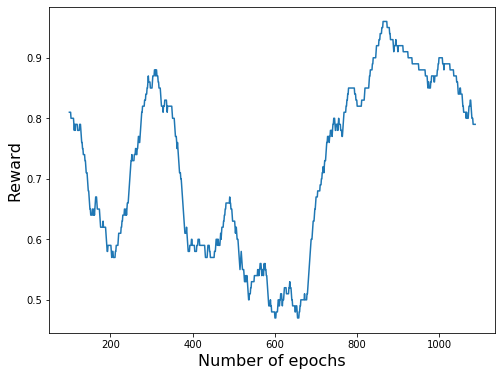

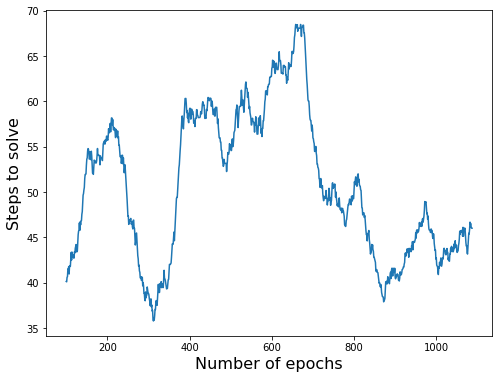

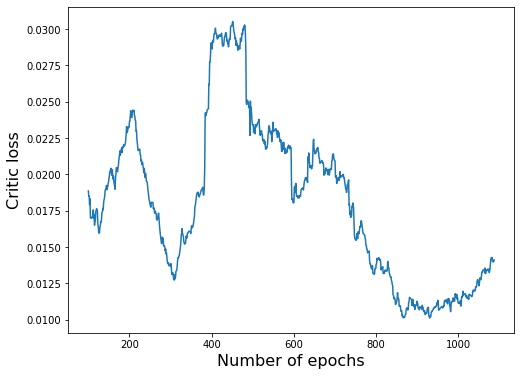

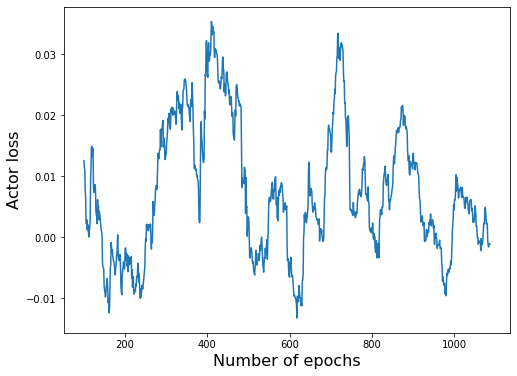

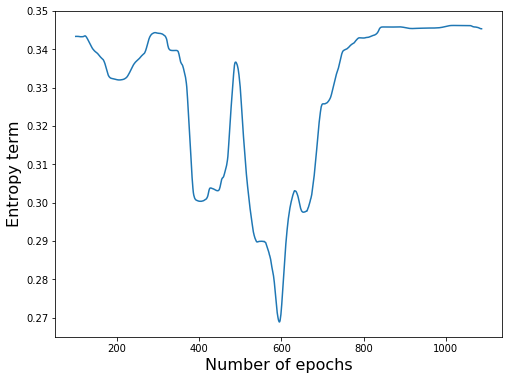

In [11]:
plot.plot_session(score, steps_to_solve, losses)

In [2]:
from Utils import single_A2C_training as A2C_train

In [3]:
# Variable parameters
X = 5
Y = 5
initial = [0,0]
goal = [4,4]
MAX_STEPS = 100

game_params = dict(x=X, y=Y, initial=initial, goal=goal, max_steps=MAX_STEPS, 
                   greyscale_state=True, return_ohe=True)

In [4]:
relational_HPs = torch.load("Results/Sandbox/Supervised/best_HP_S_chosen-residual_UMUT")
relational_HPs

{'n_kernels': 36,
 'n_features': 256,
 'n_heads': 1,
 'n_attn_modules': 2,
 'feature_hidden_dim': 16,
 'feature_n_residuals': 1}

In [5]:
name = "GatedBoxWorldNet"
action_space = 4
HPs = dict(gamma=0.99, n_steps=5, H=1e-3, **relational_HPs)
learning_rate = 1e-4
shared_architecture = False

if torch.cuda.is_available():
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'
    
print("Using device "+HPs['device'])
    
agent_constructor = ActorCriticConstructor(name, shared_architecture, action_space, **HPs)
agent = agent_constructor.generate_model()

Using device cuda
Model:  <class 'AC_modules.Networks.GatedBoxWorldNet'>
self.model:  <class 'AC_modules.Networks.GatedBoxWorldNet'>
self.shared:  False
self.args:  (4,)
self.kwargs:  {'gamma': 0.99, 'n_steps': 5, 'H': 0.001, 'n_kernels': 36, 'n_features': 256, 'n_heads': 1, 'n_attn_modules': 2, 'feature_hidden_dim': 16, 'feature_n_residuals': 1, 'device': 'cuda'}


In [6]:
from Utils import test_env

In [7]:
# see if everything works before starting the real training cycle
env = test_env.Sandbox(**game_params)
rewards, log_probs, distributions, states, done, bootstrap = A2C_train.play_episode(agent, env, max_steps=MAX_STEPS)

print("rewards: ", rewards.shape)
print("log_probs: ", len(log_probs))
print("distributions: ", len(distributions))
print("states: ", states.shape)
print("done: ", done.shape)
print("bootstrap: ", bootstrap.shape)

agent.compute_ac_loss(rewards, log_probs, distributions, states, done, bootstrap)

rewards:  (34,)
log_probs:  34
distributions:  34
states:  (35, 3, 7, 7)
done:  (34,)
bootstrap:  (34,)


(tensor(0.1559, device='cuda:0', grad_fn=<MseLossBackward>),
 tensor(0.2022, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(-0.3450, device='cuda:0', grad_fn=<MeanBackward0>))

In [8]:
%%time
results = A2C_train.train_sandbox(agent, game_params, learning_rate, n_episodes = 11000,
                              max_steps=MAX_STEPS, return_agent=True, random_init=True)

Episode 10 - reward: 0.70 - steps to solve: 60.60
Episode 20 - reward: 0.60 - steps to solve: 45.90
Episode 30 - reward: 0.40 - steps to solve: 64.80
Episode 40 - reward: 0.10 - steps to solve: 98.40
Episode 50 - reward: 0.70 - steps to solve: 44.40
Episode 60 - reward: 0.60 - steps to solve: 55.70
Episode 70 - reward: 0.70 - steps to solve: 45.50
Episode 80 - reward: 0.40 - steps to solve: 79.20
Episode 90 - reward: 0.40 - steps to solve: 82.70
Episode 100 - reward: 0.50 - steps to solve: 63.50
Episode 110 - reward: 0.70 - steps to solve: 50.60
Episode 120 - reward: 0.50 - steps to solve: 61.20
Episode 130 - reward: 0.60 - steps to solve: 61.30
Episode 140 - reward: 0.70 - steps to solve: 46.60
Episode 150 - reward: 0.90 - steps to solve: 50.10
Episode 160 - reward: 0.90 - steps to solve: 37.40
Episode 170 - reward: 0.80 - steps to solve: 33.70
Episode 180 - reward: 0.60 - steps to solve: 56.10
Episode 190 - reward: 0.50 - steps to solve: 60.00
Episode 200 - reward: 0.50 - steps to so

Episode 1610 - reward: 0.70 - steps to solve: 55.60
Episode 1620 - reward: 0.90 - steps to solve: 43.60
Episode 1630 - reward: 1.00 - steps to solve: 20.60
Episode 1640 - reward: 0.70 - steps to solve: 58.00
Episode 1650 - reward: 0.80 - steps to solve: 42.10
Episode 1660 - reward: 0.80 - steps to solve: 44.80
Episode 1670 - reward: 0.70 - steps to solve: 46.90
Episode 1680 - reward: 0.80 - steps to solve: 52.60
Episode 1690 - reward: 0.60 - steps to solve: 57.30
Episode 1700 - reward: 1.00 - steps to solve: 38.90
Episode 1710 - reward: 0.70 - steps to solve: 63.50
Episode 1720 - reward: 0.80 - steps to solve: 41.10
Episode 1730 - reward: 0.90 - steps to solve: 28.70
Episode 1740 - reward: 0.60 - steps to solve: 48.30
Episode 1750 - reward: 0.60 - steps to solve: 62.20
Episode 1760 - reward: 0.40 - steps to solve: 64.30
Episode 1770 - reward: 0.20 - steps to solve: 86.40
Episode 1780 - reward: 0.60 - steps to solve: 52.00
Episode 1790 - reward: 0.40 - steps to solve: 69.70
Episode 1800

Episode 3190 - reward: 0.70 - steps to solve: 61.00
Episode 3200 - reward: 0.80 - steps to solve: 41.80
Episode 3210 - reward: 0.60 - steps to solve: 55.50
Episode 3220 - reward: 1.00 - steps to solve: 44.20
Episode 3230 - reward: 0.80 - steps to solve: 46.00
Episode 3240 - reward: 0.80 - steps to solve: 44.20
Episode 3250 - reward: 0.90 - steps to solve: 55.40
Episode 3260 - reward: 0.60 - steps to solve: 60.70
Episode 3270 - reward: 1.00 - steps to solve: 37.00
Episode 3280 - reward: 0.80 - steps to solve: 41.70
Episode 3290 - reward: 0.80 - steps to solve: 36.00
Episode 3300 - reward: 0.70 - steps to solve: 58.70
Episode 3310 - reward: 0.90 - steps to solve: 36.30
Episode 3320 - reward: 0.70 - steps to solve: 55.00
Episode 3330 - reward: 0.70 - steps to solve: 51.60
Episode 3340 - reward: 0.60 - steps to solve: 60.90
Episode 3350 - reward: 0.80 - steps to solve: 38.40
Episode 3360 - reward: 0.90 - steps to solve: 36.50
Episode 3370 - reward: 0.90 - steps to solve: 44.30
Episode 3380

Episode 4770 - reward: 0.90 - steps to solve: 35.40
Episode 4780 - reward: 0.90 - steps to solve: 29.40
Episode 4790 - reward: 0.70 - steps to solve: 39.10
Episode 4800 - reward: 0.50 - steps to solve: 55.30
Episode 4810 - reward: 0.70 - steps to solve: 48.60
Episode 4820 - reward: 0.90 - steps to solve: 49.70
Episode 4830 - reward: 0.80 - steps to solve: 51.80
Episode 4840 - reward: 0.90 - steps to solve: 28.40
Episode 4850 - reward: 0.80 - steps to solve: 41.10
Episode 4860 - reward: 0.70 - steps to solve: 57.30
Episode 4870 - reward: 0.80 - steps to solve: 57.40
Episode 4880 - reward: 0.80 - steps to solve: 52.80
Episode 4890 - reward: 0.80 - steps to solve: 40.90
Episode 4900 - reward: 0.90 - steps to solve: 38.50
Episode 4910 - reward: 0.50 - steps to solve: 66.00
Episode 4920 - reward: 0.70 - steps to solve: 54.10
Episode 4930 - reward: 0.80 - steps to solve: 48.00
Episode 4940 - reward: 0.80 - steps to solve: 43.10
Episode 4950 - reward: 0.70 - steps to solve: 63.40
Episode 4960

Episode 6350 - reward: 1.00 - steps to solve: 35.00
Episode 6360 - reward: 0.70 - steps to solve: 49.90
Episode 6370 - reward: 0.70 - steps to solve: 60.50
Episode 6380 - reward: 0.80 - steps to solve: 44.90
Episode 6390 - reward: 0.70 - steps to solve: 59.80
Episode 6400 - reward: 0.80 - steps to solve: 40.50
Episode 6410 - reward: 0.60 - steps to solve: 59.30
Episode 6420 - reward: 0.90 - steps to solve: 41.00
Episode 6430 - reward: 0.90 - steps to solve: 33.60
Episode 6440 - reward: 1.00 - steps to solve: 23.20
Episode 6450 - reward: 1.00 - steps to solve: 20.50
Episode 6460 - reward: 1.00 - steps to solve: 18.20
Episode 6470 - reward: 1.00 - steps to solve: 26.80
Episode 6480 - reward: 1.00 - steps to solve: 19.00
Episode 6490 - reward: 1.00 - steps to solve: 29.40
Episode 6500 - reward: 0.90 - steps to solve: 30.00
Episode 6510 - reward: 0.80 - steps to solve: 31.10
Episode 6520 - reward: 1.00 - steps to solve: 25.30
Episode 6530 - reward: 1.00 - steps to solve: 28.40
Episode 6540

Episode 7930 - reward: 0.90 - steps to solve: 22.10
Episode 7940 - reward: 0.90 - steps to solve: 48.50
Episode 7950 - reward: 0.80 - steps to solve: 35.90
Episode 7960 - reward: 0.90 - steps to solve: 44.20
Episode 7970 - reward: 0.70 - steps to solve: 44.90
Episode 7980 - reward: 0.70 - steps to solve: 38.80
Episode 7990 - reward: 0.70 - steps to solve: 44.50
Episode 8000 - reward: 0.60 - steps to solve: 52.60
Episode 8010 - reward: 0.60 - steps to solve: 61.00
Episode 8020 - reward: 1.00 - steps to solve: 20.60
Episode 8030 - reward: 0.90 - steps to solve: 38.20
Episode 8040 - reward: 0.70 - steps to solve: 42.30
Episode 8050 - reward: 0.50 - steps to solve: 57.20
Episode 8060 - reward: 0.20 - steps to solve: 84.90
Episode 8070 - reward: 0.50 - steps to solve: 57.00
Episode 8080 - reward: 0.70 - steps to solve: 50.90
Episode 8090 - reward: 0.40 - steps to solve: 74.50
Episode 8100 - reward: 0.50 - steps to solve: 64.30
Episode 8110 - reward: 0.60 - steps to solve: 60.50
Episode 8120

Episode 9510 - reward: 1.00 - steps to solve: 9.80
Episode 9520 - reward: 0.80 - steps to solve: 28.90
Episode 9530 - reward: 0.90 - steps to solve: 22.90
Episode 9540 - reward: 0.80 - steps to solve: 24.90
Episode 9550 - reward: 1.00 - steps to solve: 15.00
Episode 9560 - reward: 0.80 - steps to solve: 43.30
Episode 9570 - reward: 1.00 - steps to solve: 13.90
Episode 9580 - reward: 1.00 - steps to solve: 16.20
Episode 9590 - reward: 1.00 - steps to solve: 9.90
Episode 9600 - reward: 0.90 - steps to solve: 22.40
Episode 9610 - reward: 1.00 - steps to solve: 15.30
Episode 9620 - reward: 1.00 - steps to solve: 21.30
Episode 9630 - reward: 0.80 - steps to solve: 32.20
Episode 9640 - reward: 0.90 - steps to solve: 22.10
Episode 9650 - reward: 0.90 - steps to solve: 19.30
Episode 9660 - reward: 1.00 - steps to solve: 17.50
Episode 9670 - reward: 1.00 - steps to solve: 10.50
Episode 9680 - reward: 0.80 - steps to solve: 34.10
Episode 9690 - reward: 1.00 - steps to solve: 9.80
Episode 9700 - 

In [9]:
score, asymptotic_score, asymptotic_std, trained_agent, time_profile, losses, steps_to_solve = results

Average time for playing one episode: 0.14 s
Average time for updating the agent: 0.19 s
Asymptotic score: 0.936 +/- 0.244


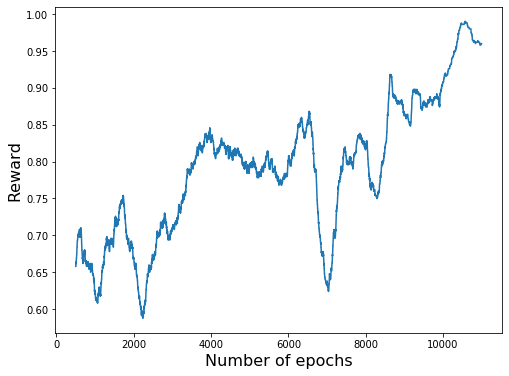

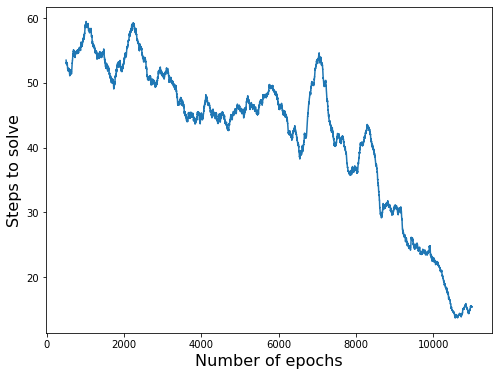

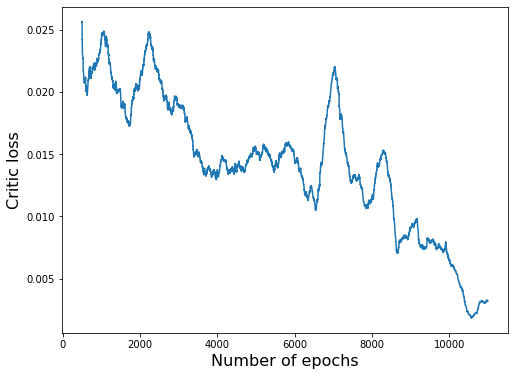

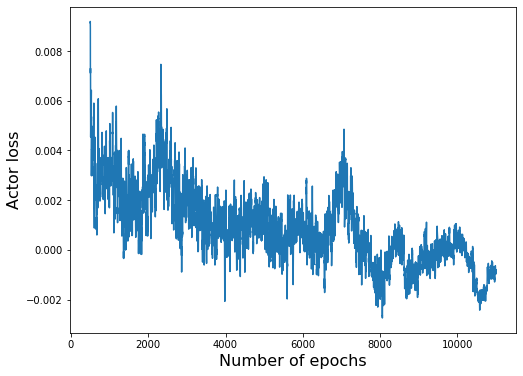

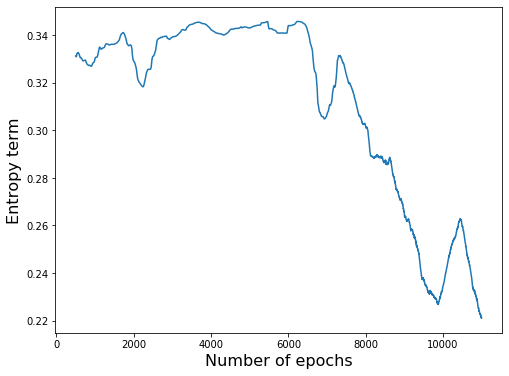

In [16]:
plot.plot_results(results, moving_average=True, average_window=500)

In [15]:
save = True
keywords = ['relational','gated','5by5',"independent", 'A2C', str(len(score))+"-episodes","100-steps"] # example

if save:
    save_dir = 'Results/Sandbox/'
    ID = utils.save_session(save_dir, keywords, game_params, HPs, score, steps_to_solve, losses)
    torch.save(trained_agent, save_dir+"agent_"+ID)
else:
    print("Nothing saved")
    pass

Save at Results/Sandbox/S_relational_gated_5by5_independent_A2C_11000-episodes_100-steps_ZGXL


/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type IndependentAC. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Actor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won'